<a href="https://colab.research.google.com/github/rezamohammadloo/shakespeare_peom_generator/blob/main/shakespeare_peom_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


--2024-01-09 05:12:32--  https://storage.googleapis.com/learning-datasets/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2024-01-09 05:12:32 (97.4 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)


In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirection  (None, 10, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [5]:
history = model.fit(predictors, label, epochs=100, verbose=1)



Epoch 1/100
484/484 [==============================] - 23s 28ms/step - loss: 6.9105 - accuracy: 0.0215
Epoch 2/100
484/484 [==============================] - 9s 19ms/step - loss: 6.4981 - accuracy: 0.0210
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.3873 - accuracy: 0.0265
Epoch 4/100
484/484 [==============================] - 7s 15ms/step - loss: 6.2666 - accuracy: 0.0296
Epoch 5/100
484/484 [==============================] - 5s 9ms/step - loss: 6.1778 - accuracy: 0.0363
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0990 - accuracy: 0.0385
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0215 - accuracy: 0.0404
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9418 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.8384 - accuracy: 0.0492
Epoch 10/100
484/484 [==============================] - 5s 9ms/step - loss: 5.7275

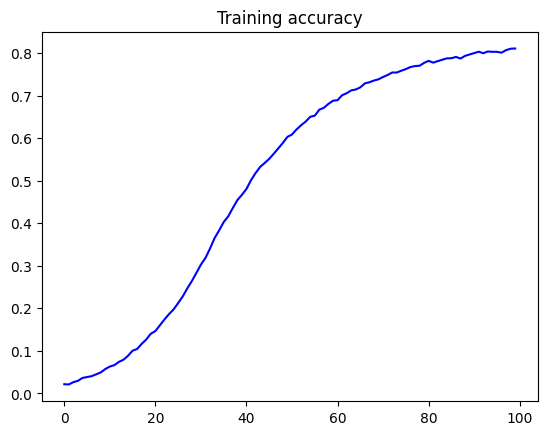

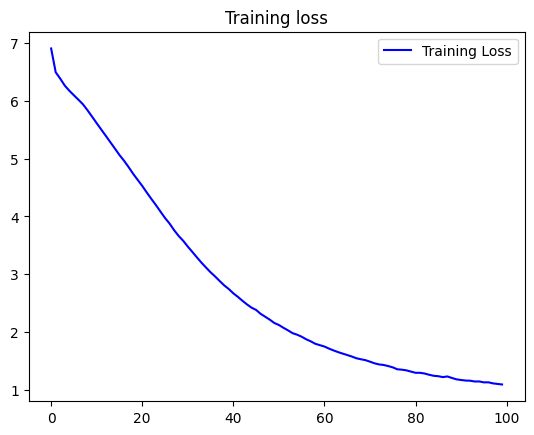

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [10]:
# Define seed text
#seed_text = "Help me Obi Wan Kenobi, you're my only hope"
seed_text = "you are my one and only"
# Define total words to predict
next_words = 15

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list, verbose=0)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:

		# Look up the word associated with the index.
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result
print(seed_text)

you are my one and only i make love told foes common friend so die to die give me spend lie
